In [3]:
using DifferentialEquations
using LinearAlgebra
using Plots

In [96]:
include("Solvers.jl")
include("PlotFunctions.jl")
include("UsefulFunctions.jl")

Correlation (generic function with 1 method)

In [3]:
θ, μ, β = 10, 28, 8/3
p = [θ, μ, β]
Δt = 0.001
N = 100

100

In [4]:
initial_points = [ ]
for i = 1:100
    x = i*[0.1,0.1,0.1]
    push!(initial_points, x)
end

In [5]:
M = zeros(length(initial_points), N)
for i = 1:length(initial_points)
    x = initial_points[i]
    X = []
    push!(X,SolutionLorenz(p, Δt, N, x, RK4))
    push!(X,SolutionLorenz(p, Δt, N, x, EulerForward))
    for j = 1:N
        M[i,j] = Correlation(X[1][:,j], X[2][:,j])
    end
end


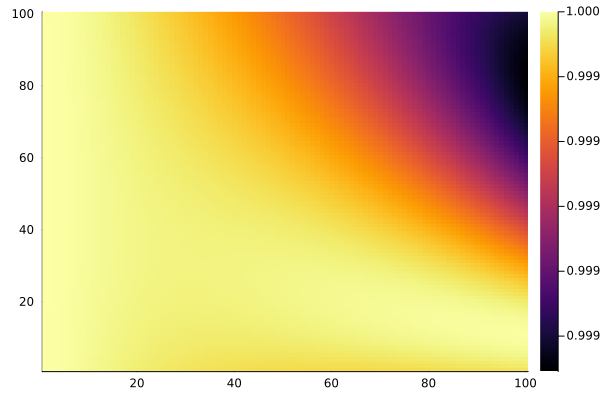

In [6]:
heatmap(M)

In [7]:
function CorrelationMatrix(p,N,dt,initial_points,Solvers, ratio)
    r = ratio
    M = zeros(length(initial_points), N+1)
    for i = 1:length(initial_points)
        x = initial_points[i]
        X = []
        for k = 1:2
            if typeof(Solvers[k]) == UnionAll
                push!(X,SolutionLorenzJuliaSolver(p, dt/r[k], N*r[k], x, Solvers[k])[1:ratio[k]:end])
            else
                push!(X,SolutionLorenz(p, dt/r[k], N*r[k], x, Solvers[k])[:,1:ratio[k]:end])
            end
        end
        for j = 1:N+1
            M[i,j] = Correlation(X[1][:,j], X[2][:,j])
        end
    end
    return M
end

CorrelationMatrix (generic function with 1 method)

In [103]:
θ, μ, β = 10, 28, 8/3
p = [θ, μ, β]
Δt = 0.01
N = 5000
initial_points = [ ]
points = 100
for i = 1:points
    x = i*[0.01,0,0]
    push!(initial_points, x)
end

In [104]:
M = CorrelationMatrix(p,N,Δt,initial_points,[RK4 RadauIIA5],[1 1]);

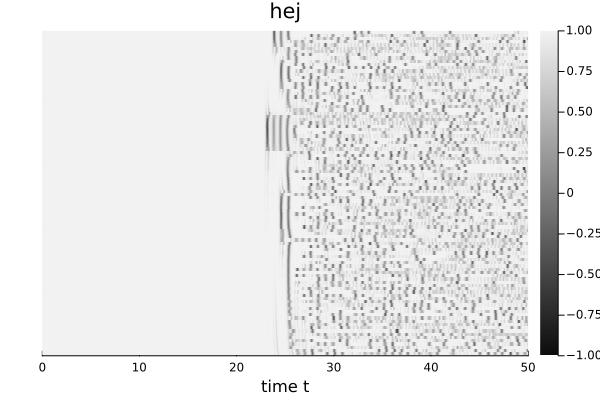

In [105]:
PlotPipPlot(M,Δt,title="hej")

0.01